Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

Exploring & Simple Clean-Up of Data:

In [2]:
#exploring data set
df = pd.read_csv(r"C:\Users\okach\OneDrive\Desktop\000_Berkeley\AmazonCoupons\coupons.csv")
df.head()
df.sample(10)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
#reviewing blanks in data
df.isnull().sum()
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [4]:
#checking for unique values
df.select_dtypes('object').nunique()
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [5]:
#examining unique values
for i in df.select_dtypes('object').columns:
    print(i, df[i].unique())

destination ['No Urgent Place' 'Home' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['2PM' '10AM' '6PM' '7AM' '10PM']
coupon ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration ['1d' '2h']
gender ['Female' 'Male']
age ['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
education ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Constr

In [6]:
#this column has only one unique value so we should drop these as they're not useful: toCoupon_GEQ5min
df.drop(columns=['toCoupon_GEQ5min'], inplace=True)

#this column is the opposite of direction_same so dropping it as it's not useful
df.drop(columns=['direction_opp'], inplace=True)

What % of total population chose to accept the coupon?

In [7]:
accepted = df['Y'] == 1
pct = accepted.mean() * 100
print(pct)

56.84326710816777


In [8]:
px.bar(df, y= 'coupon')


In [9]:
px.histogram(df, x = 'temperature')

Grouping categoric values into numeric map to expand analysis capabilities:

In [10]:
freq_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}

age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7
}

edu_map = {
    'Some High School': 0,
    'High School Graduate': 1,
    'Some college - no degree': 2,
    'Associates degree': 3,
    'Bachelors degree': 4,
    'Graduate degree (Masters or Doctorate)': 5
}
income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8
}

In [11]:
# Creating mapped frequency columns based on categorical mapping defined above, while retaining original values 
freq_cols = ['Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'CoffeeHouse', 'Bar']
for col in freq_cols:
    df[col + '_mapped'] = df[col].map(freq_map)

df['age_mapped'] = df['age'].map(age_map)
df['education_mapped'] = df['education'].map(edu_map)
df['income_mapped'] = df['income'].map(income_map)

Validating Frequency Columns, Age, Education, Income mapped columns have been added

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   destination                  12684 non-null  object 
 1   passanger                    12684 non-null  object 
 2   weather                      12684 non-null  object 
 3   temperature                  12684 non-null  int64  
 4   time                         12684 non-null  object 
 5   coupon                       12684 non-null  object 
 6   expiration                   12684 non-null  object 
 7   gender                       12684 non-null  object 
 8   age                          12684 non-null  object 
 9   maritalStatus                12684 non-null  object 
 10  has_children                 12684 non-null  int64  
 11  education                    12684 non-null  object 
 12  occupation                   12684 non-null  object 
 13  income          

### Exploration #1: Bar Coupons Analysis

In [13]:
df_bar = df.copy()

df_bar = df_bar[df_bar['coupon'].str.contains('Bar')]
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,Y,Restaurant20To50_mapped,RestaurantLessThan20_mapped,CarryAway_mapped,CoffeeHouse_mapped,Bar_mapped,age_mapped,education_mapped,income_mapped
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,0,0,2.0,3.0,NaN,0.0,0.0,1,2,3
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,1,1,2.0,3.0,NaN,0.0,0.0,1,2,3
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,0,0,2.0,3.0,NaN,0.0,0.0,1,2,3
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,0,1,1.0,3.0,3.0,1.0,0.0,1,4,5
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,1,1,1.0,3.0,3.0,1.0,0.0,1,4,5


1a) What % of Bar coupons were accepted?

In [14]:
accepted = df_bar['Y'] == 1
pct = accepted.mean() * 100
print(f'Percent of Bar Coupons Accepted: {pct:.2f}')

Percent of Bar Coupons Accepted: 41.00


1b) Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
# Below is a bar chart visualization visual interpretation of the question.

# define the desired order for the 'Bar' categories for easier chart readability

df_bar['Bar'] = df_bar['Bar'].replace('gt8', '> 8')
df_bar['Bar'] = df_bar['Bar'].replace('less1', '< 1')   

# remap to show bar visits aggregted into two categories: 3 or Fewer times & Over 3 Times

def map_bar_categories(value):
    if value in ['never', '< 1', '1~3']:
        return '3 or less'
    elif value in ['4~8', '> 8']:
        return '> 3 times'
    else:
        return value  

# Apply the mapping function to the 'Bar' column
df_bar['bar_aggregated'] = df_bar['Bar'].apply(map_bar_categories)

# Map 'Y' values to Accepted for easier readability of coupon acceptance on the chart
df_bar['Status'] = df_bar['Y'].map({1: 'Accepted', 0: 'Not Accepted'})

fig = px.histogram(df_bar, x='bar_aggregated', color='Status',
                   category_orders={'bar_aggregated': ['3 or fewer times', 'more than 3 times']},
                   color_discrete_map={'Accepted': 'green', 'Not Accepted': 'grey'}
                    )

fig.update_layout(
   title = 'Bar Coupon Acceptance Rate Based on Monthly Bar Visits',
    xaxis_title='Monthly Bar Visits',
    yaxis_title='Count of Coupon Acceptance vs Not Accepted',
    legend_title='Coupon Acceptance Status',
    width=600, height=400)

fig.show()

# conclusion: looks like about 1/3 of the infrequent bar visitors accept the coupon vs. 2/3 of those who visit over 3 times accept it

In [16]:
# below is a percentage calculation for more percise 
df_bar['target_group_1b'] = (df_bar['Bar_mapped'] < 3)

# acceptance rate for target group 1b
target_group_1b_rate = df_bar[df_bar['target_group_1b'] == 1]['Y'].mean()

# acceptance rate for all others
others_1b_rate = df_bar[df_bar['target_group_1b'] == 0]['Y'].mean()

# compare the acceptance rates
print(f"Acceptance Rate - Target Group 1b: {target_group_1b_rate:.2f}")
print(f"Acceptance Rate - All Others: {others_1b_rate:.2f}")

# conclusion: similar to the data we got from the chart, below is a more exact acceptance rate calculation

Acceptance Rate - Target Group 1b: 0.37
Acceptance Rate - All Others: 0.73


1c) Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
#calculating acceptance rate of target group 1c, described in this question 

df_bar['target_group_1c'] = ((df_bar['Bar_mapped'] > 1) & (df_bar['age_mapped'] > 1))

# acceptance rate for target group 1c
target_group_1c_rate = df_bar[df_bar['target_group_1c'] == 1]['Y'].mean()

# acceptance rate for all others
others_1c_rate = df_bar[df_bar['target_group_1c'] == 0]['Y'].mean()

# compare the acceptance rates
print(f"Acceptance Rate - Target Group 1c: {target_group_1c_rate:.2f}")
print(f"Acceptance Rate - All Others: {others_1c_rate:.2f}")


Acceptance Rate - Target Group 1c: 0.70
Acceptance Rate - All Others: 0.34


1d) Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
#checking to see what unique values exist in passanger to learn that kids are represented as 'kid(s)' in the database
#print(df_bar.passanger.unique())

#calculating acceptance rate of target group 1d, described in this question 
df_bar['target_group_1d'] = (df_bar['Bar_mapped'] > 1) & (df_bar['passanger'] != 'kid(s)')
target_group_1d_rate = df_bar[df_bar['target_group_1d'] == 1]['Y'].mean()
others_1d_rate = df_bar[df_bar['target_group_1d'] == 0]['Y'].mean()
print(f"Acceptance Rate - Target Group 1d: {target_group_1d_rate:.2f}")
print(f"Acceptance Rate - All Others: {others_1d_rate:.2f}")


Acceptance Rate - Target Group 1d: 0.69
Acceptance Rate - All Others: 0.29


1e) Compare the acceptance rates between those drivers who:
- 1e1: go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- 1e2: go to bars more than once a month and are under the age of 30 *OR*
- 1e3: go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [19]:
# group 3: go to bars > 1 month & passanger NOT kid & NOT widowed
df_bar['target_group_1e1'] = (df_bar['Bar_mapped'] > 1) & (df_bar['passanger'] != 'kid(s)') & (df_bar['maritalStatus'] != 'Widowed')
target_group_1e1_rate = df_bar[df_bar['target_group_1e1'] == 1]['Y'].mean()
others_3_rate = df_bar[df_bar['target_group_1e1'] == 0]['Y'].mean()

# group 4: go to bars > 1 month & under 30
df_bar['target_group_1e2'] = (df_bar['Bar_mapped'] > 1) & (df_bar['age_mapped'] < 3)
target_group_1e2_rate = df_bar[df_bar['target_group_1e2'] == 1]['Y'].mean()
others_4_rate = df_bar[df_bar['target_group_1e2'] == 0]['Y'].mean()

# group 5: go to cheap restaurants > 4 month, income < $50k
df_bar['target_group_1e3'] = (df_bar['RestaurantLessThan20_mapped'] > 2) & (df_bar['income_mapped'] < 4)
target_group_1e3_rate = df_bar[df_bar['target_group_1e3'] == 1]['Y'].mean()
others_5_rate = df_bar[df_bar['target_group_1e3'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 1e1: {target_group_1e1_rate:.2f}')
print(f'Acceptance Rate - Group 1e2: {target_group_1e2_rate:.2f}')
print(f'Acceptance Rate - Group 1e3: {target_group_1e3_rate:.2f}')

Acceptance Rate - Group 1e1: 0.69
Acceptance Rate - Group 1e2: 0.72
Acceptance Rate - Group 1e3: 0.45


1f) Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers with the following characteristics are  of acceptance rate for bar coupons lie within these characteristics:
 - Drivers aged 25 - 30
 - Drivers who don't have children in the car as passengers
 - Drivers who make over 50k
 - Drivers not working in farming, fishing, forestry industries

 I would use this criteria to target my marketing better for bar coupons towrd the higher-acceptance driver groups

### Exploration #2: Exploring data further to find interesting things to dig deeper into

In [ ]:
df.hist(figsize=(15,15))
plt.show()

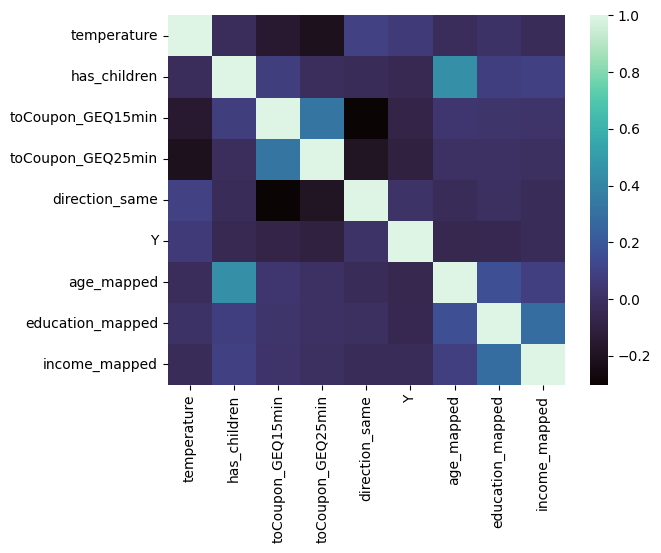

In [21]:
# heatmap of all the numerical values 

cmap = sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.select_dtypes('int64', 'float64').corr(), cmap=cmap)
plt.show()

In [23]:
df_rest = df.copy()
df_rest = df_rest[df_rest['coupon'].str.contains('50')]
df_rest.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,Y,Restaurant20To50_mapped,RestaurantLessThan20_mapped,CarryAway_mapped,CoffeeHouse_mapped,Bar_mapped,age_mapped,education_mapped,income_mapped
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,0,1,2.0,3.0,NaN,0.0,0.0,1,2,3
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,0,1,2.0,3.0,NaN,0.0,0.0,1,2,3
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,0,0,1.0,3.0,3.0,1.0,0.0,1,4,5
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,0,0,1.0,3.0,3.0,1.0,0.0,1,4,5
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,0,0,0.0,2.0,2.0,3.0,0.0,6,2,1


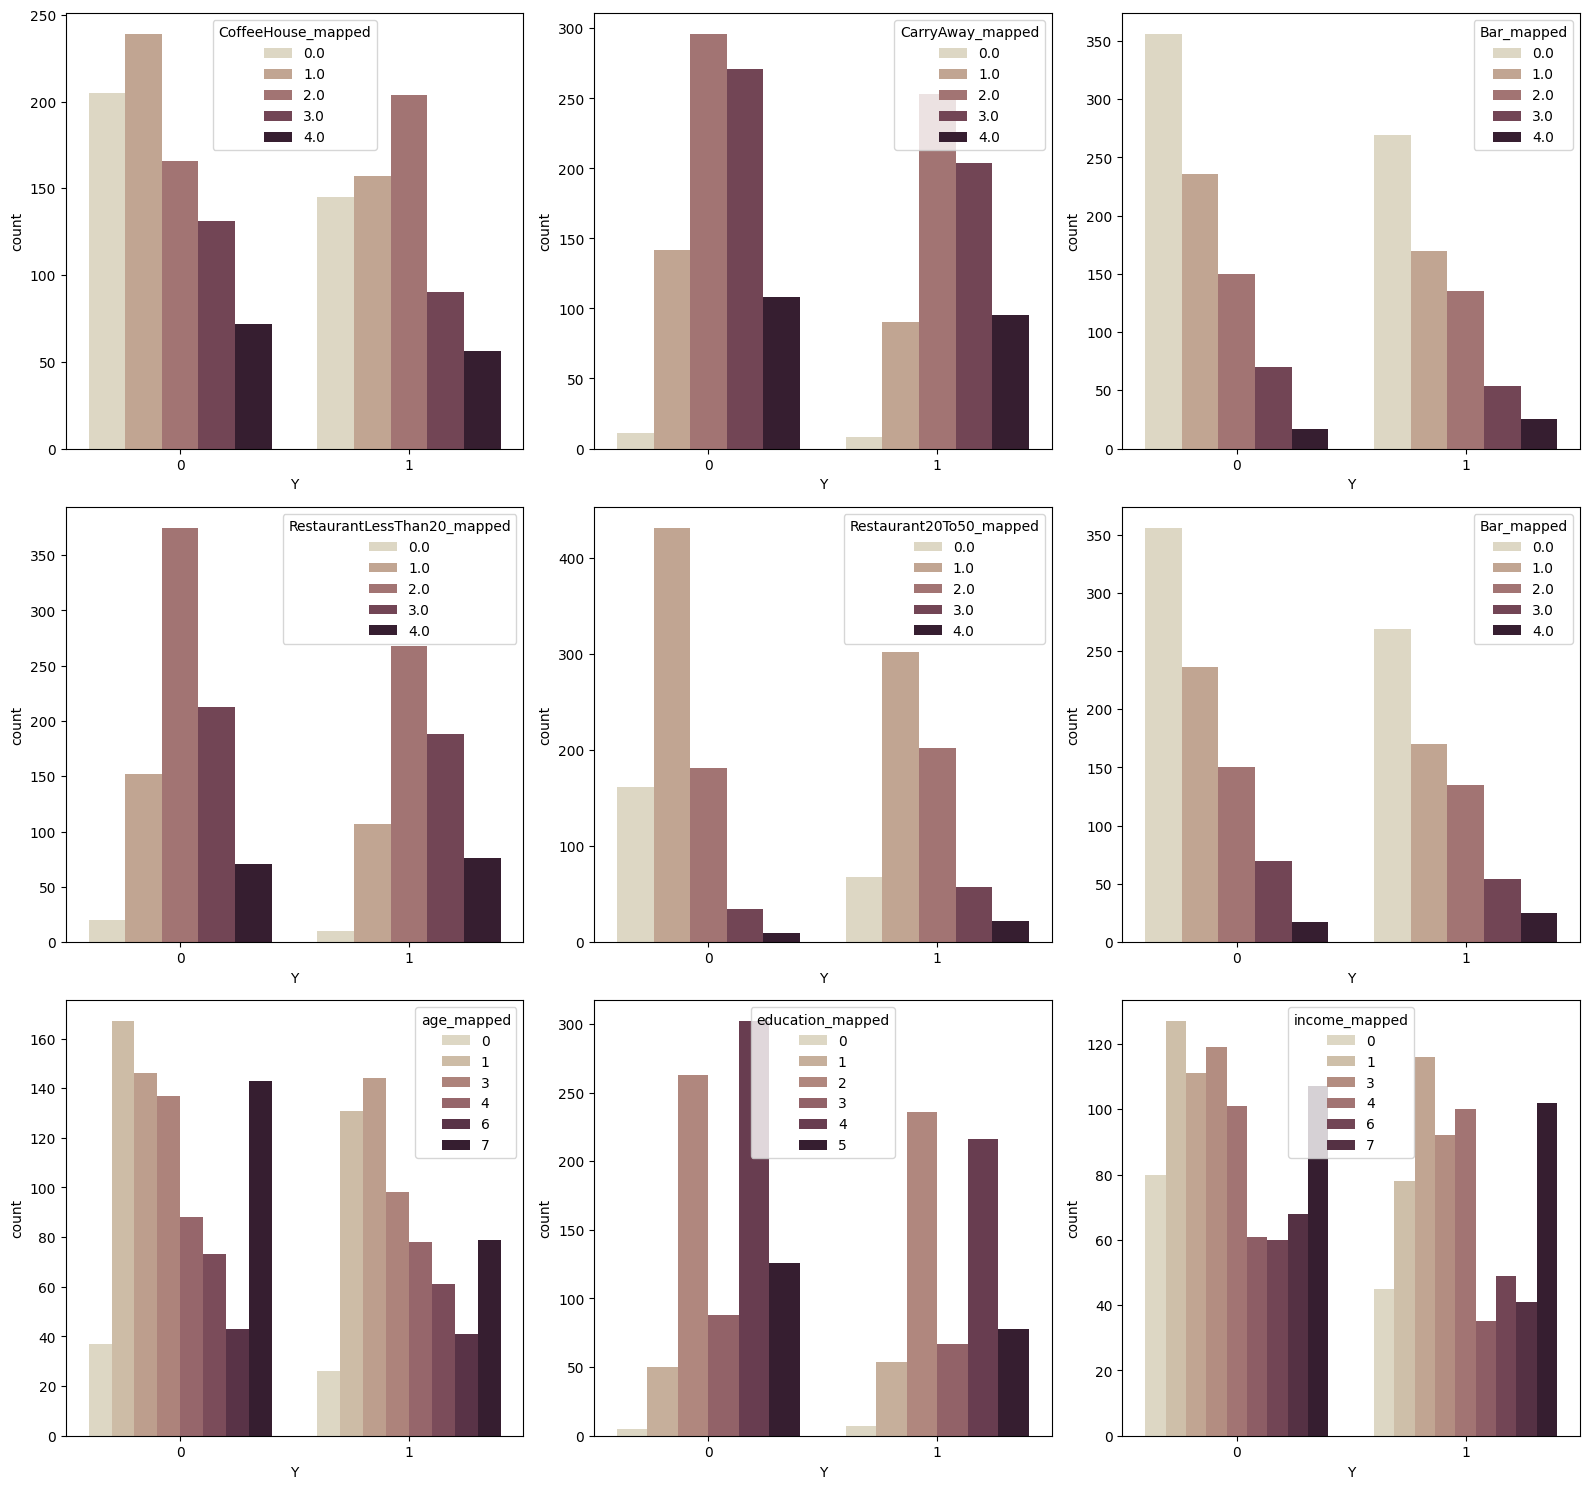

In [24]:
# subplots comparing aceptance (Y = 1) to not acceptance (Y = 0) of coupons to see if anything interesting jumps out
# freq_map categorization reminder: 'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4
# all frquency mapped variables are using frequency map categorizations in charts below

fig, axes = plt.subplots(3, 3, figsize=(16, 15))
axes = axes.flatten()

for ax, col in zip(axes, [ 'CoffeeHouse_mapped', 'CarryAway_mapped', 'Bar_mapped',
                          'RestaurantLessThan20_mapped','Restaurant20To50_mapped', 'Bar_mapped',
                          'age_mapped', 'education_mapped', 'income_mapped'
                          ]):
    sns.countplot(x="Y", hue=col, data=df_rest, 
                  ax=ax, palette="ch:.35")

plt.tight_layout()
plt.show()

### Exploration 3: Expensive Restaurant Coupons

Using the bar coupon investigation, I investigated the expensive restaurant coupons below, to find a target group that will result in high acceptance rate for this coupon. 

Group 2a: frequent expensive restaurant visitors (4+ times per week)

In [30]:
# group 2a: go to expensive restaurants > 4 month

df_rest['target_group_2a'] = (df_rest['Restaurant20To50_mapped'] > 2)
target_group_2a_rate = df_rest[df_rest['target_group_2a'] == 1]['Y'].mean()
others_2a_rate = df_rest[df_rest['target_group_2a'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2a - Goes to expensive restaurants > 4 times per month: {target_group_2a_rate:.2f}')
print(f'Acceptance Rate - Others (opposite of 2a): {others_2a_rate:.2f}')


Acceptance Rate - Group 2a - Goes to expensive restaurants > 4 times per month: 0.64
Acceptance Rate - Others (opposite of 2a): 0.42


Group 2b: Income over $50k
Group 2c: Income over $100k

In [35]:
# group 2b: income over $50k

df_rest['target_group_2b'] = (df_rest['income_mapped'] > 3)
target_group_2b_rate = df_rest[df_rest['target_group_2b'] == 1]['Y'].mean()
others_2b_rate = df_rest[df_rest['target_group_2b'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2b - Income over $50k: {target_group_2b_rate:.2f}')
print(f'Acceptance Rate - Others (opposite of 2b): {others_2b_rate:.2f}')


# group 2c: income over $100k

df_rest['target_group_2c'] = (df_rest['income_mapped'] > 7)
target_group_2c_rate = df_rest[df_rest['target_group_2c'] == 1]['Y'].mean()
others_2c_rate = df_rest[df_rest['target_group_2c'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2c - Income over $100k: {target_group_2c_rate:.2f}')
print(f'Acceptance Rate - Others (opposite of 2c): {others_2c_rate:.2f}')

Acceptance Rate - Group 2b - Income over $50k: 0.45
Acceptance Rate - Others (opposite of 2b): 0.43
Acceptance Rate - Group 2c - Income over $100k: 0.49
Acceptance Rate - Others (opposite of 2c): 0.43


Group 2d: senior drivers 50+ years old

In [45]:
# group 2d: 50+ years old

df_rest['target_group_2d'] = (df_rest['age_mapped'] > 6 ) 
target_group_2d_rate = df_rest[df_rest['target_group_2d'] == 1]['Y'].mean()
others_2d_rate = df_rest[df_rest['target_group_2d'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2d - over 50 years old : {target_group_2d_rate:.2f}')
print(f'Acceptance Rate - Others - 50 and over: {others_2d_rate:.2f}')

Acceptance Rate - Group 2d - over 50 years old : 0.36
Acceptance Rate - Others - 50 and over: 0.46


Group 2e: female

In [46]:
# group 2e: female

df_rest['target_group_2e'] = (df_rest['gender'] == "Female") 
target_group_2e_rate = df_rest[df_rest['target_group_2e'] == 1]['Y'].mean()
others_2e_rate = df_rest[df_rest['target_group_2e'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2e - female : {target_group_2e_rate:.2f}')
print(f'Acceptance Rate - Others - male: {others_2e_rate:.2f}')

Acceptance Rate - Group 2d - over 50 years old : 0.43
Acceptance Rate - Others - 50 and over: 0.46


Combining the highest acceptance rates from the analysis of 2a-2e above, below is a new target group 2f:

Target Group 2f: Visits expensive restaurants 4+ times per month AND makes $100k+ AND is younger than 50 years old AND is male

Below is a comparison of expensive restaurant coupon acceptance rate of our target group 2f vs. those not in group 2f:

Acceptance Rate - Group 2f: 0.67
Acceptance Rate - Not in Group 2f: 0.44


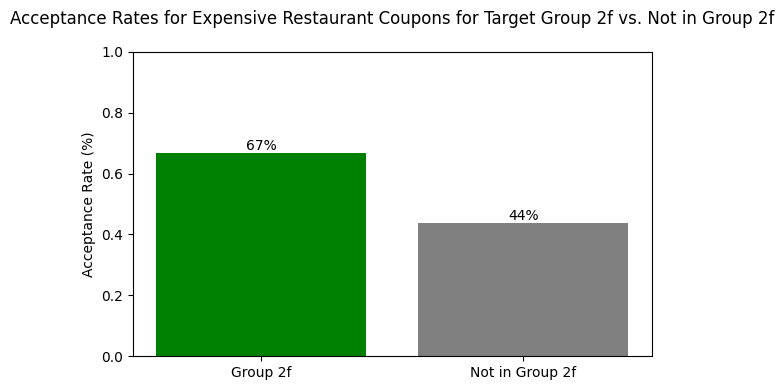

In [60]:
df_rest['target_group_2f'] = (
(df_rest['Restaurant20To50_mapped'] > 2) & 
(df_rest['income_mapped'] > 7) &
(df_rest['age_mapped'] < 7 ) &
(df_rest['gender'] == "Male") 
)

target_group_2f_rate = df_rest[df_rest['target_group_2f'] == 1]['Y'].mean()
others_2f_rate = df_rest[df_rest['target_group_2f'] == 0]['Y'].mean()

print(f'Acceptance Rate - Group 2f: {target_group_2f_rate:.2f}')
print(f'Acceptance Rate - Not in Group 2f: {others_2f_rate:.2f}')

# Acceptance rates data
rates = [target_group_2f_rate, others_2f_rate]
group_names = ['Group 2f', 'Not in Group 2f']

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(group_names, rates, color=['green', 'grey'])


for i, rate in enumerate(rates):
    ax.text(i, rate, f'{rate:.0%}', ha='center', va='bottom')

ax.set_title('Acceptance Rates for Expensive Restaurant Coupons for Target Group 2f vs. Not in Group 2f', pad = 20)
ax.set_ylabel('Acceptance Rate (%)')

ax.set_ylim(0, 1) 
plt.tight_layout()

plt.show()


Conclusion: my recommendation for expensive restaurant coupons would be to provide more of these to our successful target group 2f, which represents people who go to expensive restaurants 4+ times per week, make $100k+, are under 50 years old and are male. The acceptance rate for this Group 2f is 67% vs. for those who are not in this group 44%. Conversion of this coupon will be much more successful in this specific group based on my findings above. 